#### 1. import library and data

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity

In [2]:
ratings = pd.read_csv('../datasets/ratings_small.csv')

ratings.head()

userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

In [3]:
from datetime import datetime

# 01) 파이썬 'datetime' 패키지를 이용해서 

timestamp = 964982703
dt = datetime.utcfromtimestamp(timestamp)
print(dt)

2000-07-30 18:45:03


In [4]:
timestamps = ratings['timestamp'].values
converted_datetimes = []

for timestamp in timestamps:
    dt = datetime.utcfromtimestamp(timestamp)
    converted_datetimes.append(dt)

print(converted_datetimes)

[datetime.datetime(2000, 7, 30, 18, 45, 3), datetime.datetime(2000, 7, 30, 18, 20, 47), datetime.datetime(2000, 7, 30, 18, 37, 4), datetime.datetime(2000, 7, 30, 19, 3, 35), datetime.datetime(2000, 7, 30, 18, 48, 51), datetime.datetime(2000, 7, 30, 18, 40), datetime.datetime(2000, 7, 30, 18, 14, 28), datetime.datetime(2000, 7, 30, 18, 36, 16), datetime.datetime(2000, 7, 30, 19, 7, 21), datetime.datetime(2000, 7, 30, 19, 8, 20), datetime.datetime(2000, 7, 30, 19, 0, 50), datetime.datetime(2000, 7, 30, 18, 20, 8), datetime.datetime(2000, 7, 30, 18, 16, 25), datetime.datetime(2000, 7, 30, 18, 19, 39), datetime.datetime(2000, 7, 30, 18, 15, 8), datetime.datetime(2000, 7, 30, 18, 28), datetime.datetime(2000, 7, 30, 18, 49, 27), datetime.datetime(2000, 7, 30, 18, 38, 30), datetime.datetime(2000, 7, 30, 18, 19, 39), datetime.datetime(2000, 7, 30, 18, 42, 43), datetime.datetime(2000, 7, 30, 18, 16, 2), datetime.datetime(2000, 7, 30, 18, 43, 8), datetime.datetime(2000, 7, 30, 18, 28, 30), datet

In [5]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [6]:
len(ratings['userId'].unique())

610

In [7]:
len(ratings['movieId'].unique())

9724

In [8]:
ratings['rating'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [9]:
movies = pd.read_csv('../datasets/movies_small.csv')

movies.head()

movieId                               title   
0        1                    Toy Story (1995)  \
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [10]:
# ratings 와 movies merge

df = pd.merge(ratings, movies, on='movieId', how='inner')

df.head()

userId  movieId  rating   timestamp             title   
0       1        1     4.0   964982703  Toy Story (1995)  \
1       5        1     4.0   847434962  Toy Story (1995)   
2       7        1     4.5  1106635946  Toy Story (1995)   
3      15        1     2.5  1510577970  Toy Story (1995)   
4      17        1     4.5  1305696483  Toy Story (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1  Adventure|Animation|Children|Comedy|Fantasy  
2  Adventure|Animation|Children|Comedy|Fantasy  
3  Adventure|Animation|Children|Comedy|Fantasy  
4  Adventure|Animation|Children|Comedy|Fantasy

#### 2. EDA

In [11]:
# Aggregate by movie
agg_ratings = df.groupby('title').agg(mean_rating = ('rating', 'mean'),
                                                number_of_ratings = ('rating', 'count')).reset_index()

# Keep the movies with over 100 ratings
agg_ratings_GT100 = agg_ratings[agg_ratings['number_of_ratings']>100]

# Check the information of the dataframe
agg_ratings_GT100.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134 entries, 74 to 9615
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              134 non-null    object 
 1   mean_rating        134 non-null    float64
 2   number_of_ratings  134 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 4.2+ KB


In [12]:
agg_ratings_GT100.sort_values(by='number_of_ratings', ascending=False).head()

title  mean_rating  number_of_ratings
3158               Forrest Gump (1994)     4.164134                329
7593  Shawshank Redemption, The (1994)     4.429022                317
6865               Pulp Fiction (1994)     4.197068                307
7680  Silence of the Lambs, The (1991)     4.161290                279
5512                Matrix, The (1999)     4.192446                278

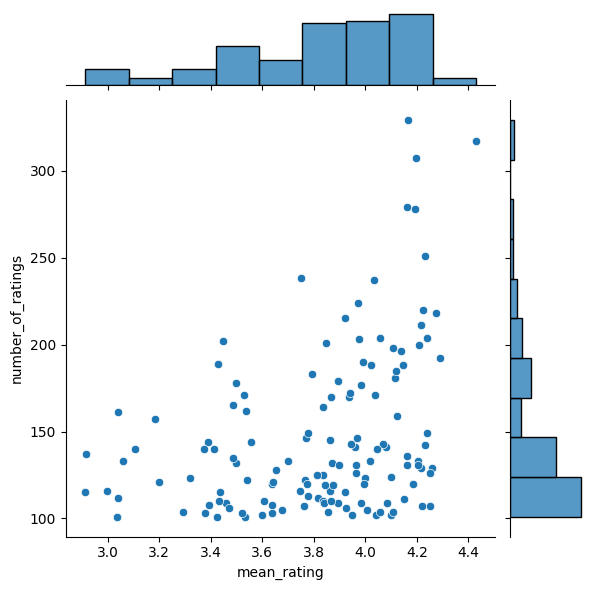

In [13]:
# visualization

sns.jointplot(x='mean_rating', y='number_of_ratings', data=agg_ratings_GT100)

In [14]:
# df 와 agg_ratings_GT100 을 merge

df_GT100 = pd.merge(df, agg_ratings_GT100, on='title', how='inner')

df_GT100.head()

userId  movieId  rating   timestamp             title   
0       1        1     4.0   964982703  Toy Story (1995)  \
1       5        1     4.0   847434962  Toy Story (1995)   
2       7        1     4.5  1106635946  Toy Story (1995)   
3      15        1     2.5  1510577970  Toy Story (1995)   
4      17        1     4.5  1305696483  Toy Story (1995)   

                                        genres  mean_rating  number_of_ratings  
0  Adventure|Animation|Children|Comedy|Fantasy      3.92093                215  
1  Adventure|Animation|Children|Comedy|Fantasy      3.92093                215  
2  Adventure|Animation|Children|Comedy|Fantasy      3.92093                215  
3  Adventure|Animation|Children|Comedy|Fantasy      3.92093                215  
4  Adventure|Animation|Children|Comedy|Fantasy      3.92093                215

In [15]:
df_GT100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19788 entries, 0 to 19787
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   userId             19788 non-null  int64  
 1   movieId            19788 non-null  int64  
 2   rating             19788 non-null  float64
 3   timestamp          19788 non-null  int64  
 4   title              19788 non-null  object 
 5   genres             19788 non-null  object 
 6   mean_rating        19788 non-null  float64
 7   number_of_ratings  19788 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 1.2+ MB


In [16]:
len(df_GT100['userId'].unique())

597

In [17]:
len(df_GT100['movieId'].unique())

134

In [18]:
len(df_GT100['rating'].unique())

10

#### 3. DF 생성
* DataFrame
    * index = movie title
    * columns = userId
    * values = rating

In [19]:
# cos 유사도분석을 할 때, 영화 평점에 대한 유사도(아이템 기반)를 보고 싶으면 인덱스를 영화로
#                        유저 평점에 대한 유사도(유저 기반)를 보고 싶으면 인덱스를 user id로

matrix = df_GT100.pivot_table(index='title', columns='userId', values='rating')

matrix.head()

userId                             1    2    3    4    5    6    7    8     
title                                                                       
2001: A Space Odyssey (1968)       NaN  NaN  NaN  NaN  NaN  NaN  4.0  NaN  \
Ace Ventura: Pet Detective (1994)  NaN  NaN  NaN  NaN  3.0  3.0  NaN  NaN   
Aladdin (1992)                     NaN  NaN  NaN  4.0  4.0  5.0  3.0  NaN   
Alien (1979)                       4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Aliens (1986)                      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

userId                             9    10   ...  601  602  603  604  605   
title                                        ...                            
2001: A Space Odyssey (1968)       NaN  NaN  ...  NaN  NaN  5.0  NaN  NaN  \
Ace Ventura: Pet Detective (1994)  NaN  NaN  ...  NaN  2.0  NaN  2.0  NaN   
Aladdin (1992)                     NaN  4.0  ...  NaN  NaN  NaN  3.0  3.5   
Alien (1979)                       NaN  NaN  ...  NaN  NaN  5.0  NaN  NaN   
Aliens (1986)                      NaN  NaN  ...  NaN  NaN  4.0  NaN  NaN   

userId                             606  607  608  609  610  
title                                                       
2001: A Space Odyssey (1968)       5.0  NaN  3.0  NaN  4.5  
Ace Ventura: Pet Detective (1994)  NaN  NaN  3.5  NaN  3.0  
Aladdin (1992)                     NaN  NaN  3.0  NaN  NaN  
Alien (1979)                       4.0  3.0  4.0  NaN  4.5  
Aliens (1986)                      3.5  NaN  4.5  NaN  5.0  

[5 rows x 597 columns]

In [20]:
matrix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134 entries, 2001: A Space Odyssey (1968) to X-Men (2000)
Columns: 597 entries, 1 to 610
dtypes: float64(597)
memory usage: 626.0+ KB


#### 4. 유사도 분석
* 영화 아이템의 평점 유사도 분석

In [21]:
# cosine_similarity 분석
# class pandas.DataFrame(data=None, index=None, columns=None, dtype=None, copy=None)[source]

cosim = cosine_similarity(matrix.fillna(0))

cos_item_similiarity = pd.DataFrame(data=cosim, index=matrix.index, columns=matrix.index)

In [22]:
cos_item_similiarity.head()

title                              2001: A Space Odyssey (1968)   
title                                                             
2001: A Space Odyssey (1968)                           1.000000  \
Ace Ventura: Pet Detective (1994)                      0.271807   
Aladdin (1992)                                         0.266670   
Alien (1979)                                           0.569947   
Aliens (1986)                                          0.563665   

title                              Ace Ventura: Pet Detective (1994)   
title                                                                  
2001: A Space Odyssey (1968)                                0.271807  \
Ace Ventura: Pet Detective (1994)                           1.000000   
Aladdin (1992)                                              0.583814   
Alien (1979)                                                0.289795   
Aliens (1986)                                               0.260504   

title                              Aladdin (1992)  Alien (1979)   
title                                                             
2001: A Space Odyssey (1968)             0.266670      0.569947  \
Ace Ventura: Pet Detective (1994)        0.583814      0.289795   
Aladdin (1992)                           1.000000      0.349844   
Alien (1979)                             0.349844      1.000000   
Aliens (1986)                            0.330907      0.773600   

title                              Aliens (1986)   
title                                              
2001: A Space Odyssey (1968)            0.563665  \
Ace Ventura: Pet Detective (1994)       0.260504   
Aladdin (1992)                          0.330907   
Alien (1979)                            0.773600   
Aliens (1986)                           1.000000   

title                              Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)   
title                                                                                     
2001: A Space Odyssey (1968)                                                0.310194     \
Ace Ventura: Pet Detective (1994)                                           0.253664      
Aladdin (1992)                                                              0.196449      
Alien (1979)                                                                0.330537      
Aliens (1986)                                                               0.273812      

title                              American Beauty (1999)   
title                                                       
2001: A Space Odyssey (1968)                     0.450858  \
Ace Ventura: Pet Detective (1994)                0.295132   
Aladdin (1992)                                   0.353335   
Alien (1979)                                     0.524065   
Aliens (1986)                                    0.480061   

title                              American History X (1998)   
title                                                          
2001: A Space Odyssey (1968)                        0.336402  \
Ace Ventura: Pet Detective (1994)                   0.297858   
Aladdin (1992)                                      0.298202   
Alien (1979)                                        0.386448   
Aliens (1986)                                       0.344400   

title                              American Pie (1999)  Apocalypse Now (1979)   
title                                                                           
2001: A Space Odyssey (1968)                  0.346073               0.569111  \
Ace Ventura: Pet Detective (1994)             0.329115               0.244806   
Aladdin (1992)                                0.334279               0.258810   
Alien (1979)                                  0.367893               0.511868   
Aliens (1986)                                 0.346839               0.475215   

title                              ...  True Lies (1994)   
title                              ...         

In [23]:
cos_item_similiarity['2001: A Space Odyssey (1968)']

title
2001: A Space Odyssey (1968)                  1.000000
Ace Ventura: Pet Detective (1994)             0.271807
Aladdin (1992)                                0.266670
Alien (1979)                                  0.569947
Aliens (1986)                                 0.563665
                                                ...   
Usual Suspects, The (1995)                    0.394586
WALL·E (2008)                                 0.293710
Waterworld (1995)                             0.209060
Willy Wonka & the Chocolate Factory (1971)    0.301007
X-Men (2000)                                  0.390909
Name: 2001: A Space Odyssey (1968), Length: 134, dtype: float64

> 위의 경우, 결측치를 0으로 대체 -> 0이 평점 수치가 아닌데, 수치로 입력되어 유사도 분석 결과에 영향을 미칠 수 있다
이를 해결하게 위해 피어슨 상관분석을 통해 유사도 분석을 할 수 있다

In [24]:
matrix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134 entries, 2001: A Space Odyssey (1968) to X-Men (2000)
Columns: 597 entries, 1 to 610
dtypes: float64(597)
memory usage: 630.1+ KB


In [27]:
# 피어슨 상관분석을 통한 유사도 분석
# DataFrame.corr(method='pearson', min_periods=1, numeric_only=False)

# Normalize user-item matrix
matrix_norm = matrix.subtract(matrix.mean(axis=1), axis = 0)
# matrix_norm.head()

item_similiarity = matrix.T.corr()     # T를 통해서 인덱스, 컬럼 Transform

In [29]:
item_similiarity

title                                       2001: A Space Odyssey (1968)   
title                                                                      
2001: A Space Odyssey (1968)                                    1.000000  \
Ace Ventura: Pet Detective (1994)                              -0.036319   
Aladdin (1992)                                                  0.017446   
Alien (1979)                                                    0.318523   
Aliens (1986)                                                   0.317386   
...                                                                  ...   
Usual Suspects, The (1995)                                      0.245279   
WALL·E (2008)                                                   0.100172   
Waterworld (1995)                                              -0.447306   
Willy Wonka & the Chocolate Factory (1971)                      0.087803   
X-Men (2000)                                                   -0.123862   

title                                       Ace Ventura: Pet Detective (1994)   
title                                                                           
2001: A Space Odyssey (1968)                                        -0.036319  \
Ace Ventura: Pet Detective (1994)                                    1.000000   
Aladdin (1992)                                                       0.302193   
Alien (1979)                                                        -0.208017   
Aliens (1986)                                                       -0.107524   
...                                                                       ...   
Usual Suspects, The (1995)                                          -0.061520   
WALL·E (2008)                                                        0.170717   
Waterworld (1995)                                                    0.176155   
Willy Wonka & the Chocolate Factory (1971)                           0.051239   
X-Men (2000)                                                         0.045676   

title                                       Aladdin (1992)  Alien (1979)   
title                                                                      
2001: A Space Odyssey (1968)                      0.017446      0.318523  \
Ace Ventura: Pet Detective (1994)                 0.302193     -0.208017   
Aladdin (1992)                                    1.000000      0.026514   
Alien (1979)                                      0.026514      1.000000   
Aliens (1986)                                     0.151152      0.705925   
...                                                    ...           ...   
Usual Suspects, The (1995)                        0.153934      0.350428   
WALL·E (2008)                                     0.272375      0.270697   
Waterworld (1995)                                 0.065342      0.119849   
Willy Wonka & the Chocolate Factory (1971)        0.164459      0.117749   
X-Men (2000)                                      0.285480      0.030257   

title                                       Aliens (1986)   
title                                                       
2001: A Space Odyssey (1968)                     0.317386  \
Ace Ventura: Pet Detective (1994)               -0.107524   
Aladdin (1992)                                   0.151152   
Alien (1979)                                     0.705925   
Aliens (1986)                                    1.000000   
...                                                   ...   
Usual Suspects, The (1995)                       0.296933   
WALL·E (2008)                                    0.294852   
Waterworld (1995)                               -0.014274   
Willy Wonka & the Chocolate Factory (1971)       0.111864   
X-Men (2000)                                     0.225923   

title                                       Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)   
title                                                                     

In [28]:
item_similiarity['2001: A Space Odyssey (1968)']

title
2001: A Space Odyssey (1968)                  1.000000
Ace Ventura: Pet Detective (1994)            -0.036319
Aladdin (1992)                                0.017446
Alien (1979)                                  0.318523
Aliens (1986)                                 0.317386
                                                ...   
Usual Suspects, The (1995)                    0.245279
WALL·E (2008)                                 0.100172
Waterworld (1995)                            -0.447306
Willy Wonka & the Chocolate Factory (1971)    0.087803
X-Men (2000)                                 -0.123862
Name: 2001: A Space Odyssey (1968), Length: 134, dtype: float64

#### 5. 하나의 영화에 대해서 User의 평점 예측 
1. user 1 기준, 등급을 매긴 영화목록 만들기
2. user1이 본 영화 평점과 American Pie (1999)의 유사도 등을 구해서 랭킹 매기기
3. Top10 선정
4. 유사도 점수의 가중 평균과 user1등을 사용하여 예측등급을 계산


In [35]:
# user 1 
picked_user = 1

# American Pie (1999) 
picked_movie = 'American Pie (1999)'

# user1이 본 영화
picked_userid_watched = pd.DataFrame(matrix_norm[picked_user].dropna(axis=0, how='all')).sort_values(by=1, ascending=False).reset_index()
picked_userid_watched = picked_userid_watched.rename(columns={1:'rating'})

In [39]:
picked_userid_watched.head()

title    rating
0       Dumb & Dumber (Dumb and Dumber) (1994)  1.939850
1  Indiana Jones and the Temple of Doom (1984)  1.361111
2                                 X-Men (2000)  1.300752
3            E.T. the Extra-Terrestrial (1982)  1.233607
4   Ghostbusters (a.k.a. Ghost Busters) (1984)  1.225000

In [59]:
# American Pie (1999) 와 유사한 영화
picked_movie_sim_score = pd.DataFrame(item_similiarity[picked_movie])
picked_movie_sim_score = picked_movie_sim_score.reset_index().rename(columns={'American Pie (1999)': 'sim_score'})

In [60]:
picked_movie_sim_score

title  sim_score
0                  2001: A Space Odyssey (1968)   0.011490
1             Ace Ventura: Pet Detective (1994)   0.173855
2                                Aladdin (1992)   0.367076
3                                  Alien (1979)  -0.006804
4                                 Aliens (1986)   0.076674
..                                          ...        ...
129                  Usual Suspects, The (1995)   0.280924
130                               WALL·E (2008)   0.060699
131                           Waterworld (1995)   0.180433
132  Willy Wonka & the Chocolate Factory (1971)   0.051963
133                                X-Men (2000)   0.191176

[134 rows x 2 columns]

In [61]:
# merge 
picked_userid_watched_sim = pd.merge(picked_userid_watched, picked_movie_sim_score, on='title', how='inner')
picked_userid_watched_sim = picked_userid_watched_sim.sort_values(by='sim_score', ascending=False)[:10]
picked_userid_watched_sim.head()

title    rating  sim_score
52                        Mission: Impossible (1996) -0.537037   0.510888
47                                    Twister (1996) -0.321138   0.476518
16  Star Wars: Episode I - The Phantom Menace (1999)  0.892857   0.443614
10                              Fugitive, The (1993)  1.007895   0.442128
19                            Green Mile, The (1999)  0.851351   0.429560

In [65]:
predict_rating = round(np.average(picked_userid_watched_sim['rating'], weights = picked_userid_watched_sim['sim_score']), 6)
predict_rating

0.313184

#### 6. Movie Recommendation
1. 대상유저가 못본 영화 목록 만든 후,
2. 안본 영화에 predict_rating 값 구하기
3. 높은 점수 순으로 상위 10개 영화를 추천


In [71]:
# 못본 영화
picked_df = pd.DataFrame(matrix_norm[1].isna()).reset_index()
picked_userid_unwatched = picked_df[picked_df[1]==True]['title'].values.tolist()


In [72]:
# 안본영화에 대한 predict_rating으로 merge

rating_prediction = {}

for picked_movie in picked_userid_unwatched:
    picked_movie_sim_score = item_similiarity[picked_movie].reset_index().rename(columns={picked_movie:'sim_score'})
    picked_userid_watched_sim = pd.merge(picked_userid_watched, picked_movie_sim_score , on='title', how='inner')
    picked_userid_watched_sim = picked_userid_watched_sim.sort_values(by='sim_score', ascending=False)[:10]
    predict_rating = round(np.average(picked_userid_watched_sim['rating'] ,weights=picked_userid_watched_sim["sim_score"] ) , 6)
    
    rating_prediction[picked_movie] = predict_rating
    

In [85]:
rating_prediction.items()

dict_items([('2001: A Space Odyssey (1968)', 0.590347), ('Ace Ventura: Pet Detective (1994)', 0.296757), ('Aladdin (1992)', 0.658992), ('Aliens (1986)', 0.327327), ("Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)", 0.453496), ('American Pie (1999)', 0.313184), ('Apollo 13 (1995)', 0.640587), ('Austin Powers: The Spy Who Shagged Me (1999)', 0.991166), ('Babe (1995)', 0.489272), ('Batman Begins (2005)', 0.650354), ('Batman Forever (1995)', 0.216289), ('Beautiful Mind, A (2001)', 0.665253), ('Beauty and the Beast (1991)', 0.439208), ('Blade Runner (1982)', 0.46937), ('Bourne Identity, The (2002)', 0.592828), ('Breakfast Club, The (1985)', 0.379866), ('Catch Me If You Can (2002)', 0.613671), ('Cliffhanger (1993)', 0.147104), ('Clueless (1995)', 0.287108), ('Crimson Tide (1995)', -0.005331), ('Crouching Tiger, Hidden Dragon (Wo hu cang long) (2000)', 0.744494), ('Dark Knight, The (2008)', 0.491468), ('Departed, The (2006)', 0.565131), ('Die Hard (1988)', 0.260045), ('Die Hard: With a 

In [86]:
import operator
sorted(rating_prediction.items(), key=operator.itemgetter(1), reverse=True)[:10]

[('Austin Powers: The Spy Who Shagged Me (1999)', 0.991166),
 ('Lord of the Rings: The Return of the King, The (2003)', 0.873138),
 ("There's Something About Mary (1998)", 0.795021),
 ('Fifth Element, The (1997)', 0.756015),
 ('Crouching Tiger, Hidden Dragon (Wo hu cang long) (2000)', 0.744494),
 ('Home Alone (1990)', 0.740627),
 ('Godfather, The (1972)', 0.68168),
 ('Terminator 2: Judgment Day (1991)', 0.668194),
 ('Truman Show, The (1998)', 0.668172),
 ('Beautiful Mind, A (2001)', 0.665253)]

#### 7. 함수화 - 영화 추천

In [102]:
def item_based_recommend(picked_user=1, number_of_similar_items=5, number_of_recommendations=3):
    # 못본 영화 List
    picked_df = pd.DataFrame(matrix_norm[picked_user].isna()).reset_index()
    picked_userid_unwatched = picked_df[picked_df[picked_user]==True]['title'].values.tolist()    

    # 본 영화 
    picked_userid_watched = pd.DataFrame(matrix_norm[picked_user].dropna(axis=0, how='all')).sort_values(by=picked_user, ascending=False).reset_index()
    picked_userid_watched = picked_userid_watched.rename(columns={picked_user:'rating'})

    # 추천 반복문
    rating_prediction = {}

    for picked_movie in picked_userid_unwatched:
        picked_movie_sim_score = item_similiarity[picked_movie].reset_index().rename(columns={picked_movie:'sim_score'})
        picked_userid_watched_sim = pd.merge(picked_userid_watched, picked_movie_sim_score , on='title', how='inner')
        picked_userid_watched_sim = picked_userid_watched_sim.sort_values(by='sim_score', ascending=False)[:number_of_similar_items]
        predict_rating = round(np.average(picked_userid_watched_sim['rating'] ,weights=picked_userid_watched_sim["sim_score"] ) , 6)
        
        rating_prediction[picked_movie] = predict_rating

    # sort하여 반환
    import operator
    return sorted(rating_prediction.items(), key=operator.itemgetter(1), reverse=True)[:number_of_recommendations]    

In [103]:
user_recommendation = int(input('추천받기 원하는 유저를 적어주세요.'))
number_of_similar_item = int(input('유사 아이템 수를 적어주세요.'))
number_of_recommandation = int(input("추천 영화 개수를 적어주세요"))
recommendation_dict = item_based_recommend(picked_user=user_recommendation, number_of_similar_items=number_of_similar_item, number_of_recommendations=number_of_recommandation)

print(recommendation_dict)

[('Clueless (1995)', 0.482582), ('Waterworld (1995)', 0.453233), ('Beauty and the Beast (1991)', 0.451889)]
